In [41]:
# Data Processing
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# For model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score


In [20]:
## Getting data ##
learned_data_path = '../processed_EEG_data\clean_learned_JoshIrby.csv'
not_learned_data_path = '../processed_EEG_data\clean_notLearned_JoshIrby.csv'

learned_data = pd.read_csv(learned_data_path)
not_learned_data = pd.read_csv(not_learned_data_path)

In [21]:
# checking how much data for each category
print(f"original learned shape: {learned_data.shape}")
print(f"original not_learned shape: {not_learned_data.shape}")

# make them equal to remove bias
learned_data = learned_data.sample(frac=1, random_state=42).reset_index(drop=True)
not_learned_data = not_learned_data.sample(frac=1, random_state=42).reset_index(drop=True)

# get length 
learned_length = learned_data.shape[0]
not_learned_length = not_learned_data.shape[0]

new_learned_data = learned_data.drop(index=range(not_learned_length, learned_length))

print(f"new learned shape: {new_learned_data.shape}")
print(f"learned shape: {learned_data.shape}")
print(f"new not_learned shape: {not_learned_data.shape}")

original learned shape: (959, 1232)
original not_learned shape: (222, 1232)
new learned shape: (222, 1232)
learned shape: (959, 1232)
new not_learned shape: (222, 1232)


In [22]:
# checking if last line had an impact
print(f"new learned shape: {new_learned_data.shape}")
print(f"new not_learned shape: {not_learned_data.shape}")

# convert pd to a np array for the feature matrix X
X_learned = new_learned_data.values  
X_not_learned = not_learned_data.values

# make the label vector y
'''
to indicate which epochs go to which condition
y vector label should be as long as x matrix is long

zeros = learned
ones = not learned
'''
y_learned = np.zeros(X_learned.shape[0])
y_not_learned = np.ones(X_not_learned.shape[0])

# combine the data and labels
# learned + not learned 
# learned labels + not learned labels
X = np.concatenate([X_learned, X_not_learned], axis=0)
y = np.concatenate([y_learned, y_not_learned], axis=0)

new learned shape: (222, 1232)
new not_learned shape: (222, 1232)


In [56]:
## MODEL ##

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# train
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

# predict
y_pred = knn.predict(X_test)

# evaluate accuracy
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n", cm)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Confusion Matrix: 
 [[20 23]
 [23 23]]
Accuracy: 0.48314606741573035


Text(0, 0.5, 'Accuracy Score')

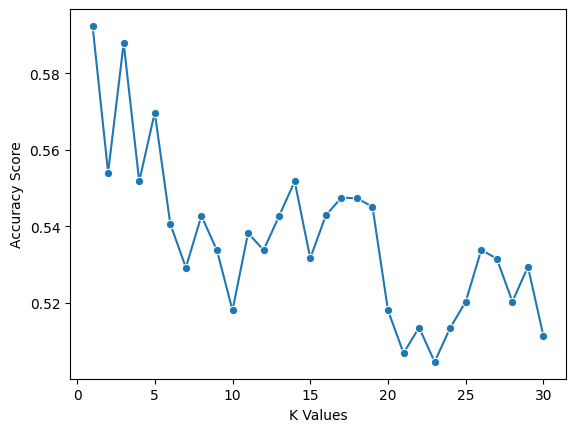

In [45]:
## FIND AN OPTIMAL K VALUE ##
k_values = [i for i in range (1,31)]
scores = []

scaler = StandardScaler()
X = scaler.fit_transform(X)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=5)
    scores.append(np.mean(score))

sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")